In [ ]:
# pip section

!pip install pandas --quiet

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [24]:
!pip install scikit-learn --quiet

In [1]:
# imports

from urllib.request import urlretrieve
import pandas as pd
import numpy as np

In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')

In [4]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
# Analysis

medical_df.info()
medical_df.describe()

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
charges_sex_fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['blue', 'pink'], 
                   title='Charges wrt Sex')
charges_sex_fig.update_layout(bargap=0.1)
charges_sex_fig.show()

In [ ]:
charges_reg_fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   # color_discrete_sequence=['blue', 'pink'], 
                   title='Charges wrt Region')
charges_reg_fig.update_layout(bargap=0.1)
charges_reg_fig.show()

In [ ]:
medical_df.smoker.value_counts()

In [ ]:
px.histogram(
    medical_df,
    x = 'smoker',
    color = 'sex',
    title = 'Smoker'
)

In [ ]:
medical_df.info()

In [ ]:
medical_df.children.value_counts()
px.histogram(
    medical_df,
    x = 'charges',
    color = 'children',
    title = 'Charges wrt children'
).update_layout(bargap = 0.1)

In [ ]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
# Correlation

medical_df.info()
smoker_values = {"yes": 1, "no": 0}
smoker_numeric = medical_df.smoker.map(smoker_values)


In [ ]:
medical_df.charges.corr(medical_df.age)

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == "no"]
non_smoker_df

plt.title("Charges vs. Non smokers age")
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)

In [25]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w = 50, b = 100)

plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel("Age")
plt.ylabel("Charges")

In [27]:
target = non_smoker_df.charges

# plt.plot(ages, estimated_charges, 'r', alpha=0.9)
# plt.scatter(ages, target, s=8,alpha=0.8)
# plt.xlabel('Age')
# plt.ylabel('Charges')
# plt.legend(['Estimate', 'Actual'])

In [ ]:
def try_params(w, b):
    ages = non_smoker_df.age
    charges = non_smoker_df.charges

    est_charges = estimate_charges(ages, w, b)

    plt.plot(ages, est_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

try_params(400, 5000)

In [17]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(predictions - targets)))

def try_params(w, b):
    ages = non_smoker_df.age
    charges = non_smoker_df.charges

    est_charges = estimate_charges(ages, w, b)

    plt.plot(ages, est_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rmse(charges, est_charges)
    print(f"Root mean squared error is {loss}")

In [17]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(predictions - targets)))

def try_params(w, b):
    ages = non_smoker_df.age
    charges = non_smoker_df.charges

    est_charges = estimate_charges(ages, w, b)

    plt.plot(ages, est_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

    loss = rmse(charges, est_charges)
    print(f"Root mean squared error is {loss}")

In [ ]:
try_params(300, 1)

## Scikit Learn 

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [6]:
model = LinearRegression()

help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [10]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [11]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [14]:
model.fit(inputs, targets)
model.predict(np.array([
    [23],
    [56],
    [19]
]))

C:\Users\91993\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855, 12874.51856198,  2986.30878723])

In [18]:
predictions = model.predict(inputs)

rmse(targets, predictions)

np.float64(4662.505766636395)

In [ ]:
plt.plot(inputs, targets, 'o')

In [ ]:
plt.plot(inputs, predictions, 'o')

In [23]:
model.coef_, model.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

Root mean squared error is 4662.505766636395


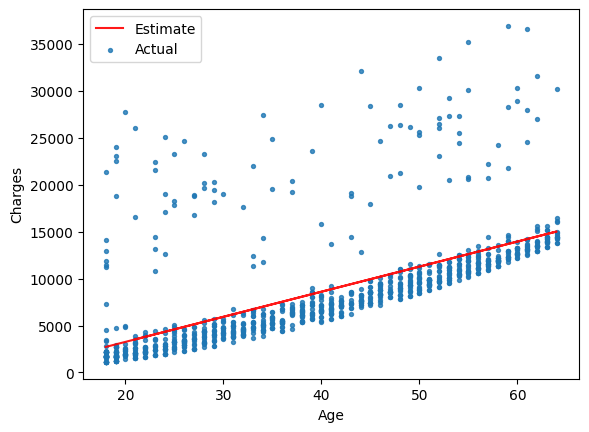

In [28]:
try_params(model.coef_, model.intercept_)

### SGD

In [30]:
from sklearn.linear_model import SGDRegressor

In [32]:
sgd_model = SGDRegressor()

sgd_model.fit(inputs, targets)

SGDRegressor()

Root mean squared error is 5028.292363837809


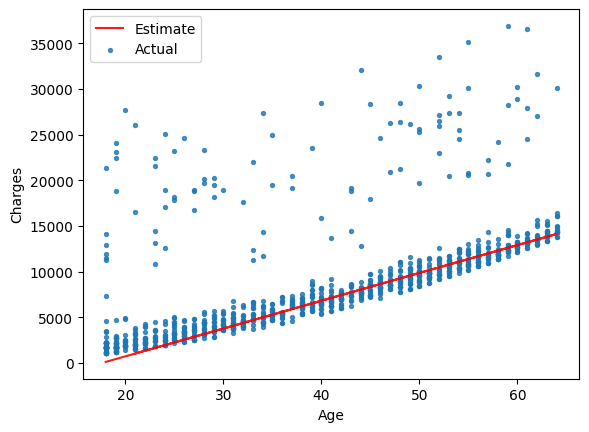

In [35]:
sgd_model.predict(inputs)
try_params(sgd_model.coef_, sgd_model.intercept_)

### Self

In [37]:
smoker_df = medical_df[medical_df.smoker == 'yes']

inputs = smoker_df[['age']]
targets = smoker_df.charges

inputs.shape, targets.shape

((274, 1), (274,))

In [46]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(predictions - targets)))

def visualise_predictions(inputs, targets, predictions):
    print(f"RMSE: {rmse(targets, predictions)}")
    plt.plot(inputs, predictions, 'r', alpha=0.9)
    plt.scatter(inputs, targets, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

In [41]:
# Training using LR

model.fit(inputs, targets)

predictions = model.predict(inputs)

RMSE: 10711.00334810241


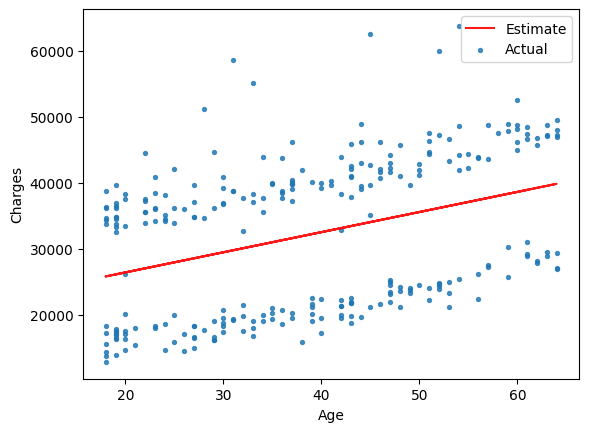

In [47]:
visualise_predictions(inputs, targets, predictions)

In [50]:
inputs, targets

(      age
 0      19
 11     62
 14     27
 19     30
 23     34
 ...   ...
 1313   19
 1314   30
 1321   62
 1323   42
 1337   61
 
 [274 rows x 1 columns],
 0       16884.92400
 11      27808.72510
 14      39611.75770
 19      36837.46700
 23      37701.87680
            ...     
 1313    36397.57600
 1314    18765.87545
 1321    28101.33305
 1323    43896.37630
 1337    29141.36030
 Name: charges, Length: 274, dtype: float64)

[12654167.52609024] [6.5365379e+09]
RMSE: 7026077239.639482


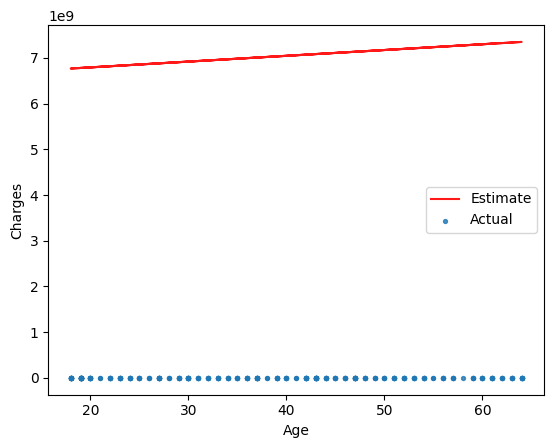

In [51]:
# Training SGD

sgd_model = SGDRegressor()

sgd_model.fit(inputs, targets)
predictions = sgd_model.predict(inputs)
print(sgd_model.coef_, sgd_model.intercept_)

visualise_predictions(inputs, targets, predictions)

**ML Training**: Process of finding the most apt params so as to model a relnship b/w the inputs and targets

3 components:
- Model
- Loss function
- Optimizer

### More params

In [53]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df.charges

inputs.shape, targets.shape

((1064, 2), (1064,))

In [57]:
lr_model = LinearRegression()

lr_model.fit(inputs, targets)

predictions = lr_model.predict(inputs)

rmse(targets, predictions)

np.float64(4662.3128354612945)

In [ ]:
# For 3D Scatter

# fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
# fig.update_traces(marker_size=3, marker_opacity=0.5)
# fig.show()

- You can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply

RMSE: 5969.772531913293


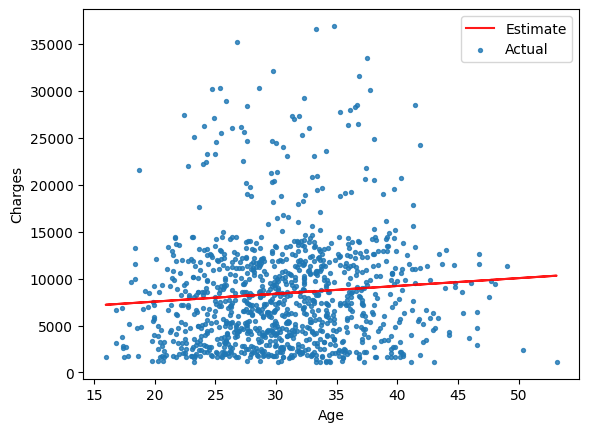

In [59]:
inputs = non_smoker_df[['bmi']]
targets = non_smoker_df.charges

lr_model = LinearRegression().fit(inputs, targets)

predictions = lr_model.predict(inputs)

visualise_predictions(inputs, targets, predictions)

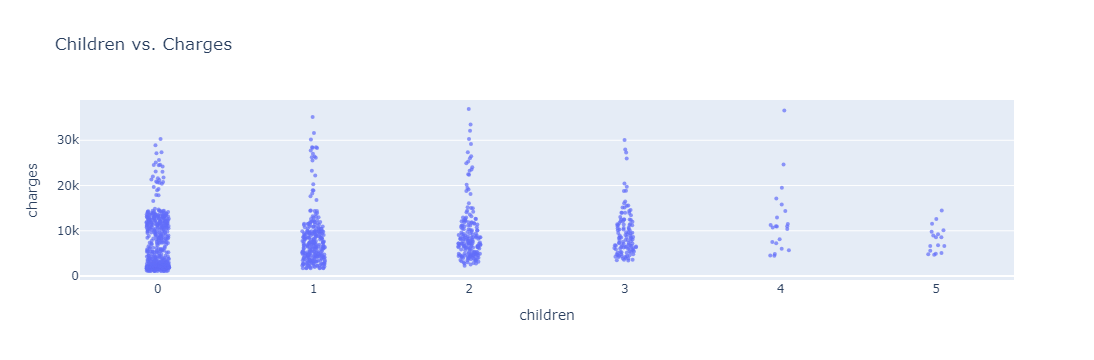

In [60]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [61]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542183)

### Categorical Features

In [27]:
smoker_codes = {'yes': 1, 'no': 0}
sex_codes = {"male": 0, "female": 1}

medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
# medical_df.charges.corr(medical_df.smoker_code)

In [34]:
from sklearn import preprocessing

encoder = preprocessing.OneHotEncoder()
encoder.fit(medical_df[['region']])
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [35]:
region_codes = encoder.transform(medical_df[['region']]).toarray()
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = region_codes

In [36]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


In [37]:
from sklearn.linear_model import LinearRegression

In [42]:
lr_model = LinearRegression()

input_cols = ['age', 'sex_code', 'bmi', 'children', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs = medical_df[input_cols]
targets = medical_df[['charges']]

lr_model.fit(inputs, targets)

lr_model.coef_

array([[  256.85635254,   131.3143594 ,   339.19345361,   475.50054515,
        23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]])

In [43]:
weights_df = pd.DataFrame({
    'fields': np.append(input_cols, 1),
    'weights': np.append(lr_model.coef_, lr_model.intercept_)
})

weights_df

,fields,weights
0,age,256.856353
1,sex_code,131.314359
2,bmi,339.193454
3,children,475.500545
4,smoker_code,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12656.862171


In [47]:
scaler = preprocessing.StandardScaler()

numeric_cols = ['age', 'bmi', 'children']
scaler.fit(medical_df[numeric_cols])

scaled_data = scaler.transform(medical_df[numeric_cols])
scaled_data


array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [48]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
 8   sex_code     1338 non-null   int64  
 9   northeast    1338 non-null   float64
 10  northwest    1338 non-null   float64
 11  southeast    1338 non-null   float64
 12  southwest    1338 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 136.0+ KB


In [49]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
cat_data = medical_df[cat_cols]

In [56]:
# After processsing, that is, scaling and categorising inputs, we have

inputs = np.concatenate((scaled_data, cat_data), axis = 1)
targets = medical_df['charges']

lr_model.fit(inputs, targets)

LinearRegression()

In [58]:
weight_analysis_df = pd.DataFrame({
    'field': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(lr_model.coef_, lr_model.intercept_)
})

weight_analysis_df

,field,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8335.168856


The most important factors thus are smoker, age, bmi

### Test Set